##### MP/BME 573: hw5

In [7]:
## MP 573 hw5
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal, ndimage, misc
from skimage.data import shepp_logan_phantom
import scipy.stats as stats

font = {'weight' : 'normal',
        'size'   : 16}

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

## Problem 2.1: Law of large numbers
Example starting out with a uniform distribution. Modify the code as described in the question, to start out with a binomial, exponential, and Gaussian distributions.

Num Ave = 1; mean = 0.52; var = 0.250
Num Ave = 10; mean = 0.50; var = 0.025
Num Ave = 50; mean = 0.50; var = 0.005
Num Ave = 1000; mean = 0.50; var = 0.000


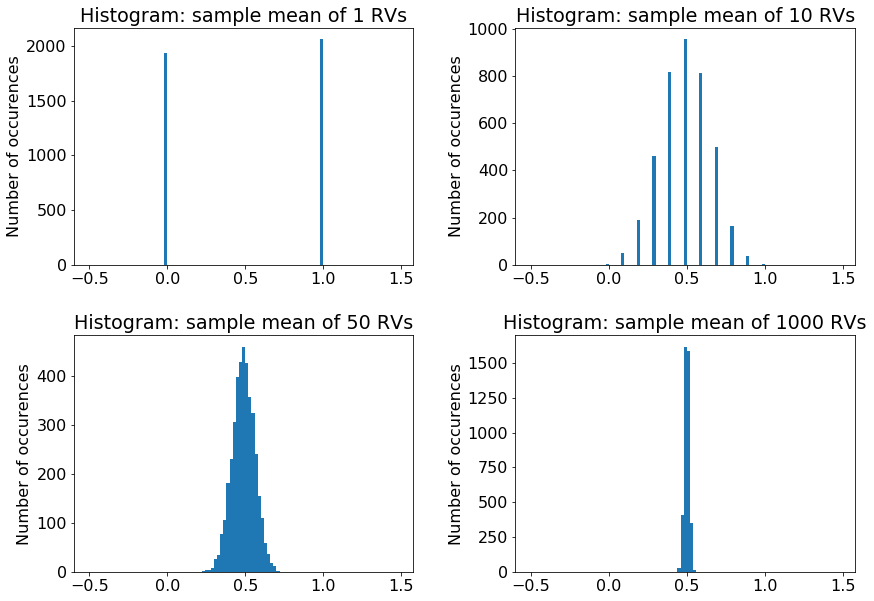

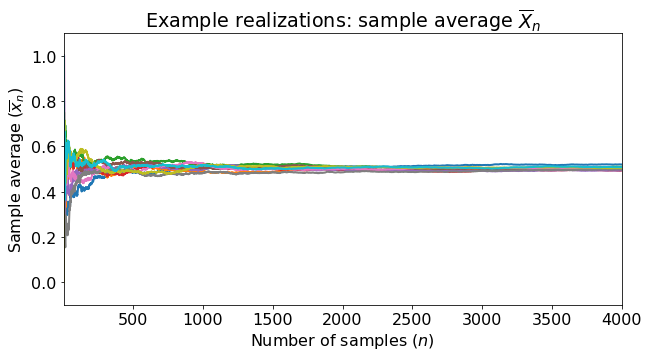

In [53]:
# Bernuilli distribution with parameter p
p = 0.5;

# Number of averages
Ave = [1,10,50,1000]

# Number of trials
N = 4000;
fig = plt.figure(figsize=(14,10))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)

for k in range(4):
    # Generate and show some data
    x = stats.bernoulli.rvs(p, size=[N,Ave[k]])
    xbar = np.mean(x,axis=1)
    print('Num Ave = ' + '{:.0f}'.format(Ave[k])  + '; mean = ' + '{:.2f}'.format(np.mean(xbar)) + '; var = ' + '{:.3f}'.format(np.var(xbar))) 
    plt.subplot(2,2,k+1)
    plt.title('Histogram: sample mean of ' + str(Ave[k]) + ' RVs')
    _ = plt.hist(xbar, bins=np.arange(-0.5,+1.5,0.02))
    plt.ylabel('Number of occurences');


# Now generate a few sequences Y_n
n_max = 4000
trials = 10
Ave = np.arange(n_max) + 1
xbar = 0.0*np.zeros((trials,n_max))
x = stats.bernoulli.rvs(p, size=[trials,n_max])
for k in np.arange(n_max):
    xcur = 1.0*x[:,0:(k+1)]
    xbar[:,k] = np.sum(xcur,axis=1)/(k+1)
    
# Plot the sequence of sample averages
plt.rc('font', **font)
fig = plt.figure(figsize=(10,5))
plt.plot(Ave,xbar.T,linewidth=2.0)
plt.axis([1,n_max,-0.1,1.1])
plt.xlabel('Number of samples ($n$)')
plt.ylabel('Sample average ($\overline{x}_n$)')
plt.title('Example realizations: sample average $\overline{X}_n$');

Num Ave = 1; mean = 8.05; var = 1.588
Num Ave = 10; mean = 8.00; var = 0.157
Num Ave = 50; mean = 8.00; var = 0.031
Num Ave = 1000; mean = 8.00; var = 0.002


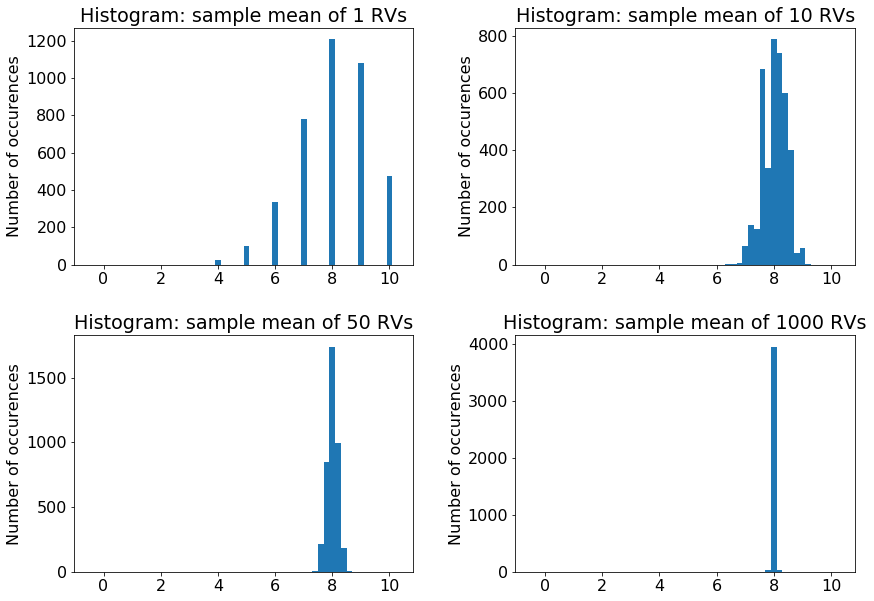

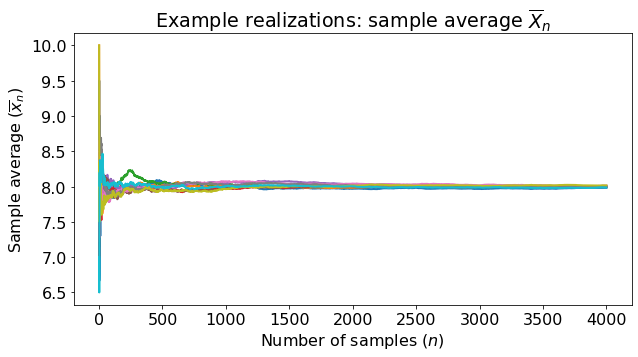

In [54]:
# Binomial distribution 
p = 0.8;
n = 10

# Number of averages
Ave = [1,10,50,1000]

# Number of trials
N = 4000;
fig = plt.figure(figsize=(14,10))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)

for k in range(4):
    # Generate and show some data
    x = stats.binom.rvs(n,p, size=[N,Ave[k]])
    xbar = np.mean(x,axis=1)
    print('Num Ave = ' + '{:.0f}'.format(Ave[k])  + '; mean = ' + '{:.2f}'.format(np.mean(xbar)) + '; var = ' + '{:.3f}'.format(np.var(xbar))) 
    plt.subplot(2,2,k+1)
    plt.title('Histogram: sample mean of ' + str(Ave[k]) + ' RVs')
    _ = plt.hist(xbar, bins=np.arange(-0.5,+10.5,0.2))
    plt.ylabel('Number of occurences');


# Now generate a few sequences Y_n
n_max = 4000
trials = 10
Ave = np.arange(n_max) + 1
xbar = 0.0*np.zeros((trials,n_max))
x = stats.binom.rvs(n,p, size=[trials,n_max])
for k in np.arange(n_max):
    xcur = 1.0*x[:,0:(k+1)]
    xbar[:,k] = np.sum(xcur,axis=1)/(k+1)
    
# Plot the sequence of sample averages
plt.rc('font', **font)
fig = plt.figure(figsize=(10,5))
plt.plot(Ave,xbar.T,linewidth=2.0)
#plt.axis([1,n_max,-0.1,1.1])
plt.xlabel('Number of samples ($n$)')
plt.ylabel('Sample average ($\overline{x}_n$)')
plt.title('Example realizations: sample average $\overline{X}_n$');

Num Ave = 1; mean = 0.50; var = 0.267
Num Ave = 10; mean = 0.50; var = 0.026
Num Ave = 50; mean = 0.50; var = 0.005
Num Ave = 1000; mean = 0.50; var = 0.000


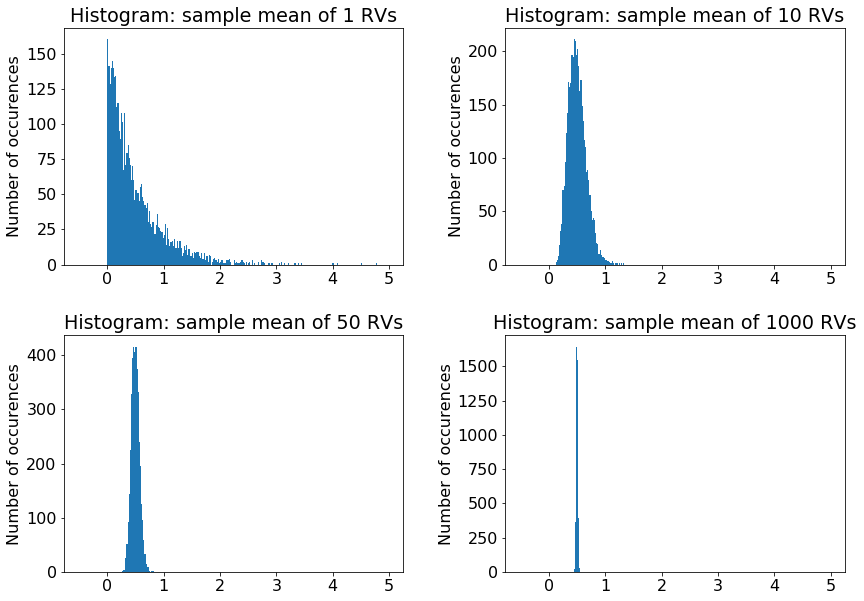

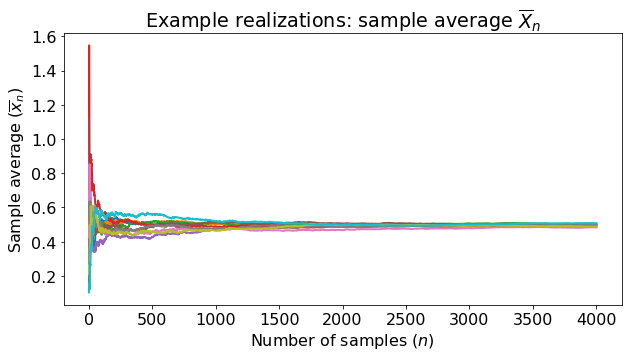

In [55]:
# Exponential distribution 
lam = 2;
offset = 0

# Number of averages
Ave = [1,10,50,1000]

# Number of trials
N = 4000;
fig = plt.figure(figsize=(14,10))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)

for k in range(4):
    # Generate and show some data
    x = stats.expon.rvs(offset,1/lam, size=[N,Ave[k]])
    xbar = np.mean(x,axis=1)
    print('Num Ave = ' + '{:.0f}'.format(Ave[k])  + '; mean = ' + '{:.2f}'.format(np.mean(xbar)) + '; var = ' + '{:.3f}'.format(np.var(xbar))) 
    plt.subplot(2,2,k+1)
    plt.title('Histogram: sample mean of ' + str(Ave[k]) + ' RVs')
    _ = plt.hist(xbar, bins=np.arange(-0.5,+5,0.02))
    plt.ylabel('Number of occurences');


# Now generate a few sequences Y_n
n_max = 4000
trials = 10
Ave = np.arange(n_max) + 1
xbar = 0.0*np.zeros((trials,n_max))
x = stats.expon.rvs(offset, 1/lam, size=[trials,n_max])
for k in np.arange(n_max):
    xcur = 1.0*x[:,0:(k+1)]
    xbar[:,k] = np.sum(xcur,axis=1)/(k+1)
    
# Plot the sequence of sample averages
plt.rc('font', **font)
fig = plt.figure(figsize=(10,5))
plt.plot(Ave,xbar.T,linewidth=2.0)
#plt.axis([1,n_max,-0.1,1.1])
plt.xlabel('Number of samples ($n$)')
plt.ylabel('Sample average ($\overline{x}_n$)')
plt.title('Example realizations: sample average $\overline{X}_n$');

Num Ave = 1; mean = 10.02; var = 2.973
Num Ave = 10; mean = 9.99; var = 0.285
Num Ave = 50; mean = 9.99; var = 0.060
Num Ave = 1000; mean = 10.00; var = 0.003


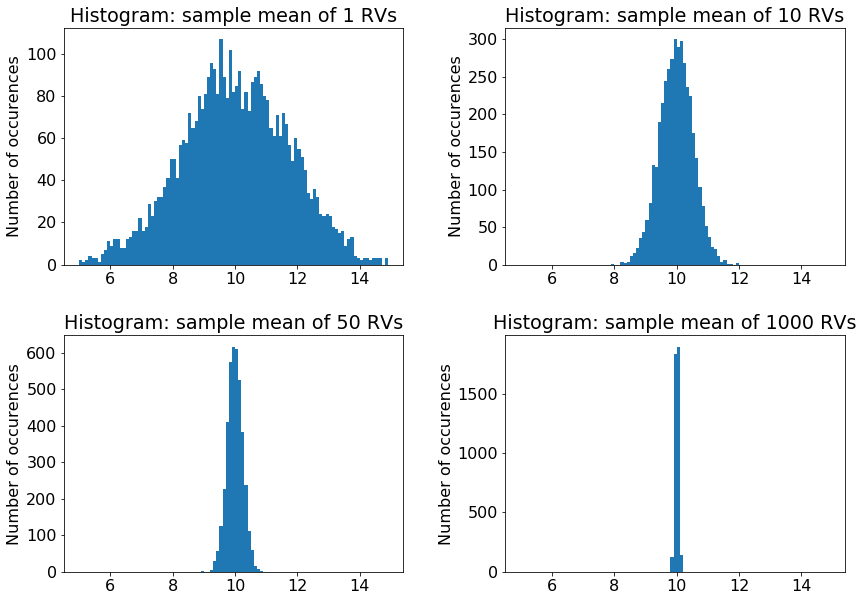

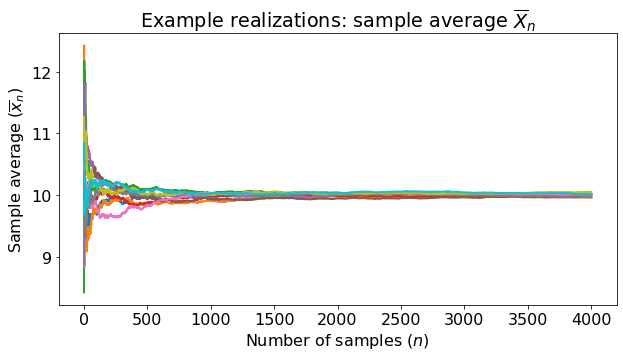

In [56]:
# Gaussian distribution 
mu = 10;
var = 3

# Number of averages
Ave = [1,10,50,1000]

# Number of trials
N = 4000;
fig = plt.figure(figsize=(14,10))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)

for k in range(4):
    # Generate and show some data
    x = stats.norm.rvs(mu,np.sqrt(var), size=[N,Ave[k]])
    xbar = np.mean(x,axis=1)
    print('Num Ave = ' + '{:.0f}'.format(Ave[k])  + '; mean = ' + '{:.2f}'.format(np.mean(xbar)) + '; var = ' + '{:.3f}'.format(np.var(xbar))) 
    plt.subplot(2,2,k+1)
    plt.title('Histogram: sample mean of ' + str(Ave[k]) + ' RVs')
    _ = plt.hist(xbar, bins=np.arange(5,+15,0.1))
    plt.ylabel('Number of occurences');


# Now generate a few sequences Y_n
n_max = 4000
trials = 10
Ave = np.arange(n_max) + 1
xbar = 0.0*np.zeros((trials,n_max))
x = stats.norm.rvs(mu,np.sqrt(var), size=[trials,n_max])
for k in np.arange(n_max):
    xcur = 1.0*x[:,0:(k+1)]
    xbar[:,k] = np.sum(xcur,axis=1)/(k+1)
    
# Plot the sequence of sample averages
plt.rc('font', **font)
fig = plt.figure(figsize=(10,5))
plt.plot(Ave,xbar.T,linewidth=2.0)
#plt.axis([1,n_max,-0.1,1.1])
plt.xlabel('Number of samples ($n$)')
plt.ylabel('Sample average ($\overline{x}_n$)')
plt.title('Example realizations: sample average $\overline{X}_n$');

## Problem 2.2: Central limit theorem

Example starting out with a uniform distribution. Modify the code as described in the question, to start out with a binomial, exponential, and Gaussian distributions. 

Num Ave = 1; mean = -0.00; var = 0.084
Num Ave = 2; mean = 0.00; var = 0.083
Num Ave = 4; mean = -0.00; var = 0.084
Num Ave = 20; mean = -0.00; var = 0.083


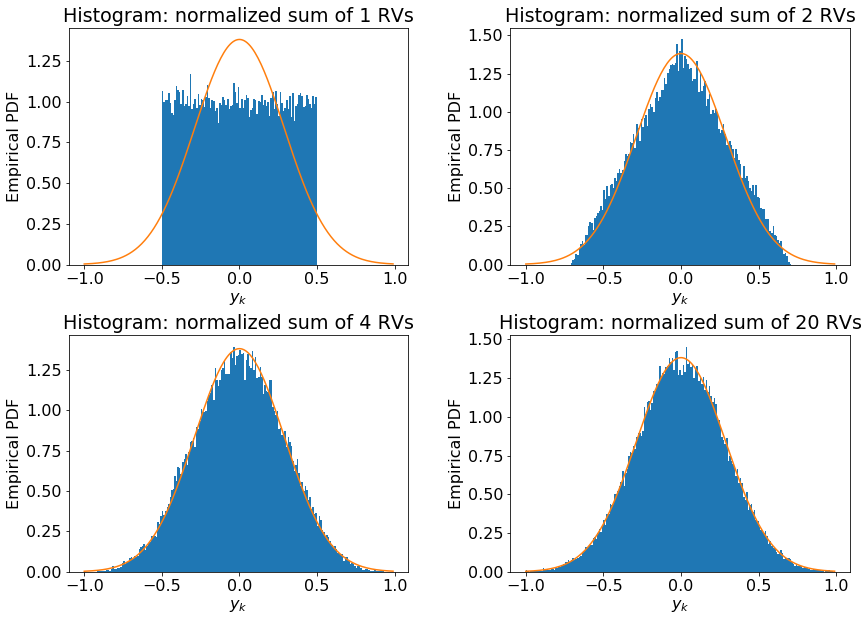

In [57]:
# Uniform example
# Distribution parameters
a = -0.5
b = 0.5
mu = (b+a)/2
var = 1/12*(b-a)**2

# Gaussian of mean zero and variance 1/12
xvals = np.arange(a-0.5,b+0.5,0.01)
pdf_gauss = stats.norm.pdf(xvals,mu,np.sqrt(var))


# Number of averages
Ave = [1,2,4,20]

# Number of trials
N = 50000;
fig = plt.figure(figsize=(14,10))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)

for k in range(4):
    # Generate and show some data
    x = stats.uniform.rvs(a, b-a, size=[N,Ave[k]])
    y = (np.sum(x,axis=1) - Ave[k]*mu)/np.sqrt(Ave[k])
    print('Num Ave = ' + '{:.0f}'.format(Ave[k])  + '; mean = ' + '{:.2f}'.format(np.mean(y)) + '; var = ' + '{:.3f}'.format(np.var(y))) 
    plt.subplot(2,2,k+1)
    plt.title('Histogram: normalized sum of ' + str(Ave[k]) + ' RVs')
    _ = plt.hist(y, bins=np.arange(a-0.5,b+0.5,0.01), density=True) # Histogram is normalized to integrate to 1 (ie: empirical PDF)
    plt.plot(xvals,pdf_gauss)
    plt.xlabel('$y_k$');
    plt.ylabel('Empirical PDF');

Num Ave = 1; mean = 0.00; var = 1.589
Num Ave = 2; mean = -0.01; var = 1.589
Num Ave = 4; mean = 0.00; var = 1.603
Num Ave = 20; mean = -0.01; var = 1.615


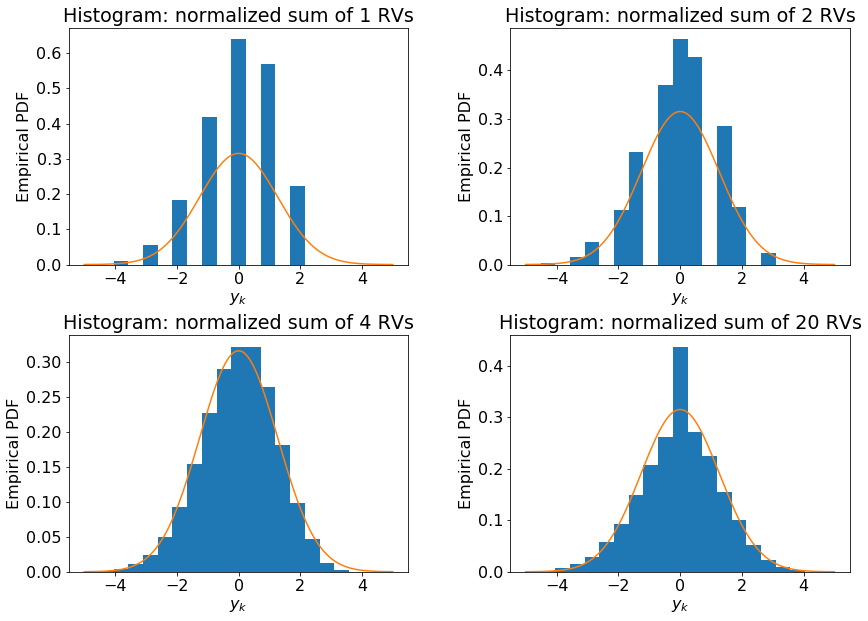

In [60]:
# Binomial example
# Distribution parameters
n = 10
p = 0.8
mu = n*p
var = n*p*(1-p)

# Gaussian of mean zero and variance same as original RV
xvals = np.arange(-5,5,0.01)
pdf_gauss = stats.norm.pdf(xvals,0,np.sqrt(var))


# Number of averages
Ave = [1,2,4,20]

# Number of trials
N = 50000;
fig = plt.figure(figsize=(14,10))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)

for k in range(4):
    # Generate and show some data
    x = stats.binom.rvs(n,p, size=[N,Ave[k]])
    y = (np.sum(x,axis=1) - Ave[k]*mu)/np.sqrt(Ave[k])
    print('Num Ave = ' + '{:.0f}'.format(Ave[k])  + '; mean = ' + '{:.2f}'.format(np.mean(y)) + '; var = ' + '{:.3f}'.format(np.var(y))) 
    plt.subplot(2,2,k+1)
    plt.title('Histogram: normalized sum of ' + str(Ave[k]) + ' RVs')
    _ = plt.hist(y, bins=np.linspace(-5,5,22), density=True) # Histogram is normalized to integrate to 1 (ie: empirical PDF)
    plt.plot(xvals,pdf_gauss)
    plt.xlabel('$y_k$');
    plt.ylabel('Empirical PDF');

Num Ave = 1; mean = -0.00; var = 0.250
Num Ave = 2; mean = -0.00; var = 0.251
Num Ave = 4; mean = -0.00; var = 0.246
Num Ave = 20; mean = -0.00; var = 0.249


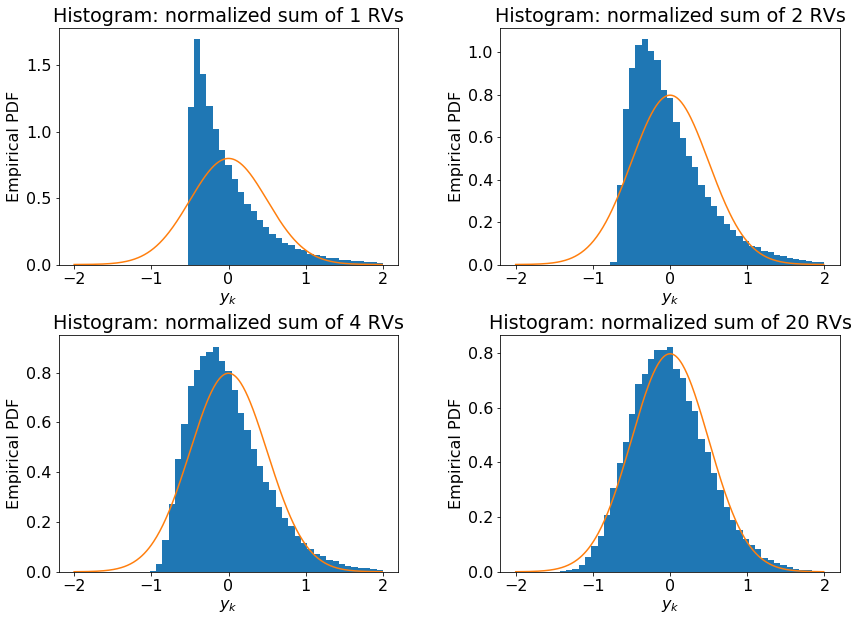

In [64]:
# Exponential example
# Distribution parameters
lam = 2
offset = 0
mu = 1/lam
var = 1/lam**2

# Gaussian of mean zero and variance same as original RV
xvals = np.arange(-2,2,0.01)
pdf_gauss = stats.norm.pdf(xvals,0,np.sqrt(var))


# Number of averages
Ave = [1,2,4,20]

# Number of trials
N = 50000;
fig = plt.figure(figsize=(14,10))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)

for k in range(4):
    # Generate and show some data
    x = stats.expon.rvs(offset,1/lam, size=[N,Ave[k]])
    y = (np.sum(x,axis=1) - Ave[k]*mu)/np.sqrt(Ave[k])
    print('Num Ave = ' + '{:.0f}'.format(Ave[k])  + '; mean = ' + '{:.2f}'.format(np.mean(y)) + '; var = ' + '{:.3f}'.format(np.var(y))) 
    plt.subplot(2,2,k+1)
    plt.title('Histogram: normalized sum of ' + str(Ave[k]) + ' RVs')
    _ = plt.hist(y, bins=np.linspace(-2,2,50), density=True) # Histogram is normalized to integrate to 1 (ie: empirical PDF)
    plt.plot(xvals,pdf_gauss)
    plt.xlabel('$y_k$');
    plt.ylabel('Empirical PDF');

Num Ave = 1; mean = -0.00; var = 2.965
Num Ave = 2; mean = -0.01; var = 2.988
Num Ave = 4; mean = -0.01; var = 2.997
Num Ave = 20; mean = 0.02; var = 2.997


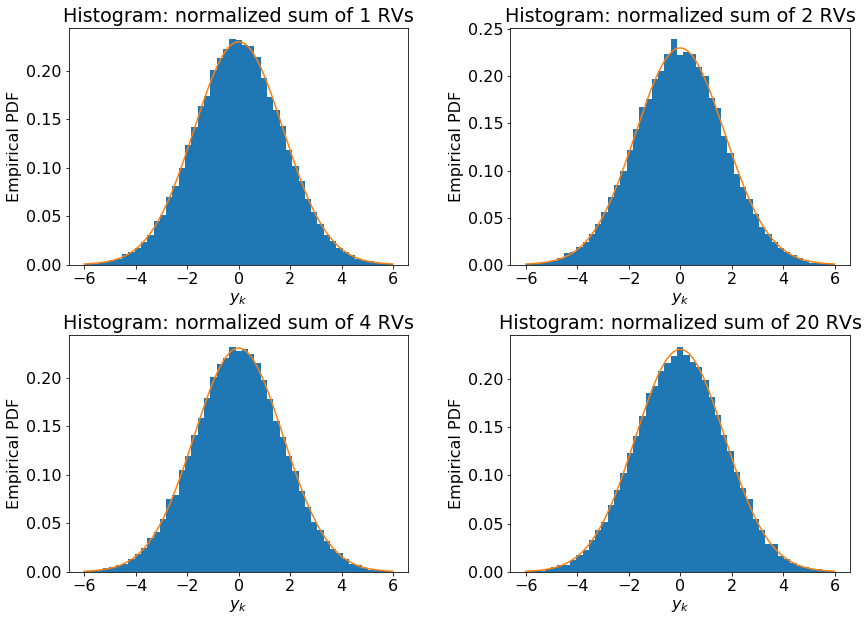

In [65]:
# Gaussian example
# Distribution parameters
mu = 10
var = 3

# Gaussian of mean zero and variance same as original RV
xvals = np.arange(-6,6,0.01)
pdf_gauss = stats.norm.pdf(xvals,0,np.sqrt(var))


# Number of averages
Ave = [1,2,4,20]

# Number of trials
N = 50000;
fig = plt.figure(figsize=(14,10))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)

for k in range(4):
    # Generate and show some data
    x = stats.norm.rvs(mu,np.sqrt(var), size=[N,Ave[k]])
    y = (np.sum(x,axis=1) - Ave[k]*mu)/np.sqrt(Ave[k])
    print('Num Ave = ' + '{:.0f}'.format(Ave[k])  + '; mean = ' + '{:.2f}'.format(np.mean(y)) + '; var = ' + '{:.3f}'.format(np.var(y))) 
    plt.subplot(2,2,k+1)
    plt.title('Histogram: normalized sum of ' + str(Ave[k]) + ' RVs')
    _ = plt.hist(y, bins=np.linspace(-6,6,50), density=True) # Histogram is normalized to integrate to 1 (ie: empirical PDF)
    plt.plot(xvals,pdf_gauss)
    plt.xlabel('$y_k$');
    plt.ylabel('Empirical PDF');

## Problem 3: Sensitivity and Specificity 

AUC for single-pixel system (empirical):
0.7195122249999999
AUC for single-pixel system:
0.71875

 AUC for weighted coin toss:
0.5


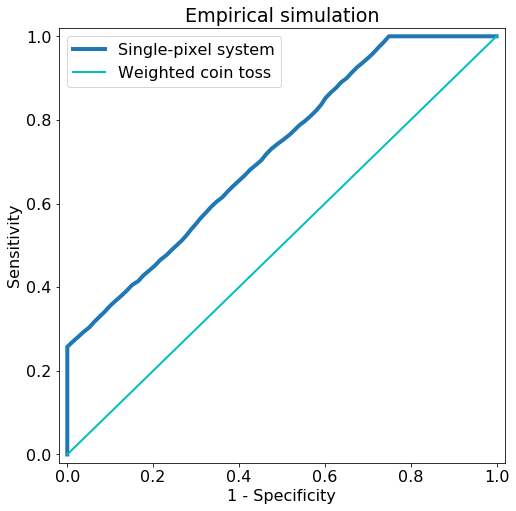

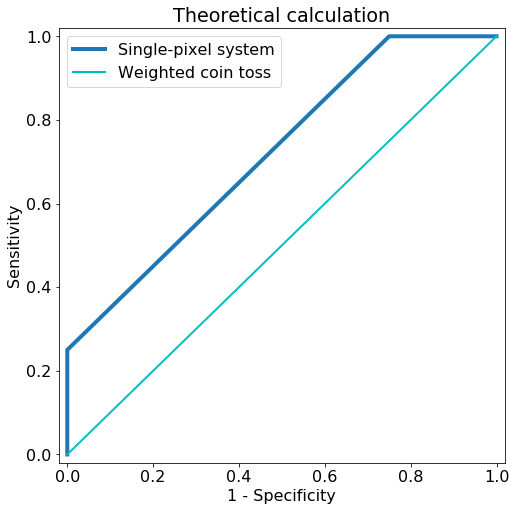

In [10]:
# Single pixel detection
mu_h = 50 # Mean in healthy tissue
mu_d = 60 # Mean in diseased tissue
a = -20 # lower bound of pixel noise
b = 20 # upper bound of pixel noise
v = np.linspace(30,80,num=101, endpoint=True) # A few thresholds to consider

## Empirical sensitivity and specificity
N = 10000
xh = stats.uniform.rvs(mu_h + a, b-a, size=N)
xd = stats.uniform.rvs(mu_d + a, b-a, size=N)

N_correctpositive = 0*v
N_correctnegative = 0*v
for k in range(v.size):
    N_correctpositive[k] = np.sum(xd > v[k])
    N_correctnegative[k] = np.sum(xh < v[k])
emp_sens = N_correctpositive/N
emp_spec = N_correctnegative/N
fig,ax = plt.subplots(figsize=(8,8))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)
plt.plot(1-emp_spec,emp_sens,linewidth=4)
plt.xlim([-0.02,1.02])
plt.ylim([-.02,1.02])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Empirical simulation')


# Add the weighted coin ROC curve
p = np.linspace(0,1,101,endpoint=True)
plt.plot(p,p,'c',linewidth=2);
ax.legend(['Single-pixel system', 'Weighted coin toss'])

# Let us calculate a simple approximation to AUC
dx = np.abs(np.diff(emp_spec))
meany = 0.5*(emp_sens[0:-1] + emp_sens[1:])
AUC_single_pixel_emp = np.sum(dx*meany)

print('AUC for single-pixel system (empirical):')
print(AUC_single_pixel_emp)



## Theoretical sensitivity and specificity
sens = 1 - stats.uniform.cdf(v,mu_d+a,b-a)
spec = stats.uniform.cdf(v,mu_h+a,b-a)

fig,ax = plt.subplots(figsize=(8,8))

plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)
plt.plot(1-spec,sens,linewidth=4)
plt.xlim([-0.02,1.02])
plt.ylim([-.02,1.02])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Theoretical calculation')



# Add the weighted coin ROC curve
p = np.linspace(0,1,101,endpoint=True)
plt.plot(p,p,'c',linewidth=2);
ax.legend(['Single-pixel system', 'Weighted coin toss'])


# Let us calculate a simple approximation to AUC
dx = np.abs(np.diff(spec))
meany = 0.5*(sens[0:-1] + sens[1:])
AUC_single_pixel = np.sum(dx*meany)

print('AUC for single-pixel system:')
print(AUC_single_pixel)
print('\n AUC for weighted coin toss:')
print(0.5)

AUC for single-pixel system (empirical):
0.972505815
AUC for multi-pixel system:
0.9734110419373878

 AUC for weighted coin toss:
0.5


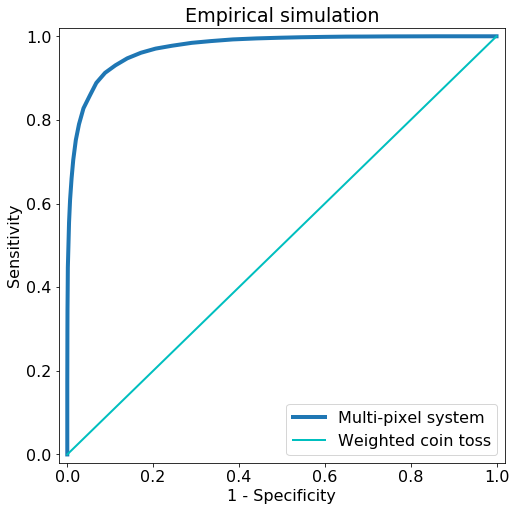

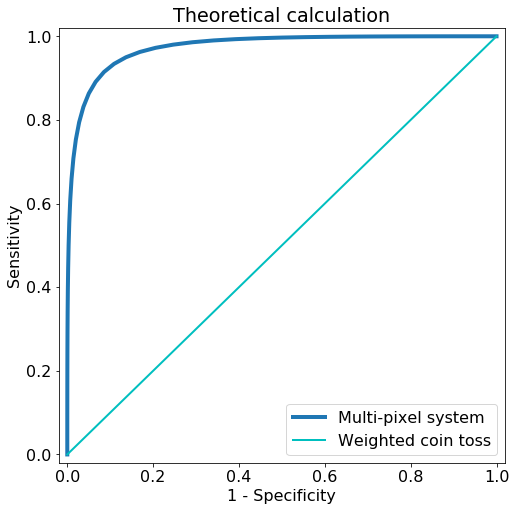

In [11]:
# Multi pixel detection
mu_h = 50 # Mean in healthy tissue
mu_d = 60 # Mean in diseased tissue
a = -20 # lower bound of pixel noise
b = 20 # upper bound of pixel noise
n = 10 # Number of pixels
v = np.linspace(30,80,num=101, endpoint=True) # A few thresholds to consider


## Empirical sensitivity and specificity
N = 10000
xh = stats.uniform.rvs(mu_h + a, b-a, size=[N,n])
xd = stats.uniform.rvs(mu_d + a, b-a, size=[N,n])
zh = np.mean(xh,axis=1)
zd = np.mean(xd,axis=1)

N_correctpositive = 0*v
N_correctnegative = 0*v
for k in range(v.size):
    N_correctpositive[k] = np.sum(zd > v[k])
    N_correctnegative[k] = np.sum(zh < v[k])
emp_sens = N_correctpositive/N
emp_spec = N_correctnegative/N
fig,ax = plt.subplots(figsize=(8,8))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)
plt.plot(1-emp_spec,emp_sens,linewidth=4)
plt.xlim([-0.02,1.02])
plt.ylim([-.02,1.02])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Empirical simulation')


# Add the weighted coin ROC curve
p = np.linspace(0,1,101,endpoint=True)
plt.plot(p,p,'c',linewidth=2);
ax.legend(['Multi-pixel system', 'Weighted coin toss'])

# Let us calculate a simple approximation to AUC
dx = np.abs(np.diff(emp_spec))
meany = 0.5*(emp_sens[0:-1] + emp_sens[1:])
AUC_single_pixel_emp = np.sum(dx*meany)

print('AUC for single-pixel system (empirical):')
print(AUC_single_pixel_emp)


## Theoretical calculation
single_pixel_var = 1/12*(b-a)**2
multi_pixel_var = 1/n*single_pixel_var


sens = 1 - stats.norm.cdf(v,mu_d,np.sqrt(multi_pixel_var))
spec = stats.norm.cdf(v,mu_h,np.sqrt(multi_pixel_var))

fig,ax = plt.subplots(figsize=(8,8))

plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)
plt.plot(1-spec,sens,linewidth=4)
plt.xlim([-0.02,1.02])
plt.ylim([-.02,1.02])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Theoretical calculation')


# Add the weighted coin ROC curve
p = np.linspace(0,1,101,endpoint=True)
plt.plot(p,p,'c',linewidth=2);
ax.legend(['Multi-pixel system', 'Weighted coin toss'])


# Let us calculate a simple approximation to AUC
dx = np.abs(np.diff(spec))
meany = 0.5*(sens[0:-1] + sens[1:])
AUC_single_pixel = np.sum(dx*meany)

print('AUC for multi-pixel system:')
print(AUC_single_pixel)
print('\n AUC for weighted coin toss:')
print(0.5)